# NBaIoT SOMKNN CLASSIFY

## Device 1

- Training on device 1 (using both Mirai and Gafgyt).
- Testing on device 1 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

/home/huunoi/Projects/research/papers/SOM-KNN-IoT_AD


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_partial, som_test, load_data_test

2022-08-07 17:51:33.703498: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-07 17:51:33.706724: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-07 17:51:33.706733: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/huunoi/Projects/research/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 1

In [8]:
train_index

1

# 1. Load data and preprocess data

In [9]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [10]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((49548, 115), (49548,)),
 ((316650, 115), (316650,)),
 ((652100, 115), (652100,)))

## Split data

In [11]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [12]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((34683, 115), (14865, 115), (34683,), (14865,))

In [13]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((221655, 115), (94995, 115), (221655,), (94995,))

In [14]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((456470, 115), (195630, 115), (456470,), (195630,))

## Set ratio

In [15]:
benign_size = data_benign_train.shape[0]
print(benign_size)

34683


In [16]:
# ratio_001 = int(0.01*benign_size)
# ratio_01 = int(0.1*benign_size)
# ratio_05 = int(0.5*benign_size)
ratio_1 = int(1.0*benign_size)
# ratio_2 = int(2.0*benign_size)
# ratio_5 = int(5.0*benign_size)

## Get train data of benign and gafgyt by ratio

In [17]:
# train 0.01
# data_gafgyt_001, _, target_gafgyt_001, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_gafgyt_01, _, target_gafgyt_01, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_gafgyt_05, _, target_gafgyt_05, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_gafgyt_2, _, target_gafgyt_2, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_gafgyt_5, _, target_gafgyt_5, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [18]:
# print(data_gafgyt_001.shape, target_gafgyt_001.shape)
# print(data_gafgyt_01.shape, target_gafgyt_01.shape)
# print(data_gafgyt_05.shape, target_gafgyt_05.shape)
print(data_gafgyt_1.shape, target_gafgyt_1.shape)
# print(data_gafgyt_2.shape, target_gafgyt_2.shape)
# print(data_gafgyt_5.shape, target_gafgyt_5.shape)

(34683, 115) (34683,)


In [19]:
# 0.01
# X_train_gafgyt_001 = np.vstack([data_benign_train, data_gafgyt_001])
# y_train_gafgyt_001 = np.hstack([target_benign_train, target_gafgyt_001])

# 0.1
# X_train_gafgyt_01 = np.vstack([data_benign_train, data_gafgyt_01])
# y_train_gafgyt_01 = np.hstack([target_benign_train, target_gafgyt_01])

# # 0.5
# X_train_gafgyt_05 = np.vstack([data_benign_train, data_gafgyt_05])
# y_train_gafgyt_05 = np.hstack([target_benign_train, target_gafgyt_05])

# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

# # 2.0
# X_train_gafgyt_2 = np.vstack([data_benign_train, data_gafgyt_2])
# y_train_gafgyt_2 = np.hstack([target_benign_train, target_gafgyt_2])

# 5.0
# X_train_gafgyt_5 = np.vstack([data_benign_train, data_gafgyt_5])
# y_train_gafgyt_5 = np.hstack([target_benign_train, target_gafgyt_5])

In [20]:
# print(X_train_gafgyt_001.shape, y_train_gafgyt_001.shape)
# print(X_train_gafgyt_01.shape, y_train_gafgyt_01.shape)
# print(X_train_gafgyt_05.shape, y_train_gafgyt_05.shape)
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)
# print(X_train_gafgyt_2.shape, y_train_gafgyt_2.shape)
# print(X_train_gafgyt_5.shape, y_train_gafgyt_5.shape)

(69366, 115) (69366,)


## Get train data of benign and Mirai by ratio

In [21]:
# train 0.01
# data_mirai_001, _, target_mirai_001, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_mirai_01, _, target_mirai_01, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_mirai_05, _, target_mirai_05, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_mirai_2, _, target_mirai_2, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_mirai_5, _, target_mirai_5, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [22]:
# print(data_mirai_001.shape, target_mirai_001.shape)
# print(data_mirai_01.shape, target_mirai_01.shape)
# print(data_mirai_05.shape, target_mirai_05.shape)
print(data_mirai_1.shape, target_mirai_1.shape)
# print(data_mirai_2.shape, target_mirai_2.shape)
# print(data_mirai_5.shape, target_mirai_5.shape)

(34683, 115) (34683,)


In [23]:
# 0.01
# X_train_mirai_001 = np.vstack([data_benign_train, data_mirai_001])
# y_train_mirai_001 = np.hstack([target_benign_train, target_mirai_001])

# 0.1
# X_train_mirai_01 = np.vstack([data_benign_train, data_mirai_01])
# y_train_mirai_01 = np.hstack([target_benign_train, target_mirai_01])

# # 0.5
# X_train_mirai_05 = np.vstack([data_benign_train, data_mirai_05])
# y_train_mirai_05 = np.hstack([target_benign_train, target_mirai_05])

# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

# # 2.0
# X_train_mirai_2 = np.vstack([data_benign_train, data_mirai_2])
# y_train_mirai_2 = np.hstack([target_benign_train, target_mirai_2])

# 5.0
# X_train_mirai_5 = np.vstack([data_benign_train, data_mirai_5])
# y_train_mirai_5 = np.hstack([target_benign_train, target_mirai_5])

In [24]:
# print(X_train_mirai_001.shape, y_train_mirai_001.shape)
# print(X_train_mirai_01.shape, y_train_mirai_01.shape)
# print(X_train_mirai_05.shape, y_train_mirai_05.shape)
print(X_train_mirai_1.shape, y_train_mirai_1.shape)
# print(X_train_mirai_2.shape, y_train_mirai_2.shape)
# print(X_train_mirai_5.shape, y_train_mirai_5.shape)

(69366, 115) (69366,)


## Get test data

### Gafgyt

In [25]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(109860, 115) (109860,)


In [26]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((14865, 115), (94995, 115), (14865,), (94995,))

## Mirai

In [27]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(210495, 115) (210495,)


In [28]:
X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [29]:
print(X_test_mirai.shape, y_test_mirai.shape)

(147346, 115) (147346,)


# 2. SOM train and test

## 2.1. Train gafgyt

## 2.1.1. Rand

In [ ]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
                                                                 y_train=y_train_gafgyt_1, 
                                                                 algo='rand')

### Test on the same device

#### Test on gafgyt

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.1.2. TPE

### Train

In [ ]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
                                                                 y_train=y_train_gafgyt_1, algo='tpe')

### Test on first device

#### Test on gafgyt

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.1.3. ATPE

### Train

In [ ]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
                                                                 y_train=y_train_gafgyt_1, algo='atpe')

### Test on the same device

#### Test on gafgyt

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.1.4. Anneal

### Train

In [ ]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
                                                                 y_train=y_train_gafgyt_1, algo='anneal')

### Test on the same device

#### Test on gafgyt

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2. Train Mirai

## 2.2.1. RAND

In [ ]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
                                                                 y_train=y_train_mirai_1, algo='rand')

### Test on the same device

#### Test on gafgyt

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2.2. TPE

### Train

In [ ]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
                                                                 y_train=y_train_mirai_1, algo='tpe')

### Test on the same device

#### Test on gafgyt

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.2.3. ATPE

### Train

In [ ]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
                                                                 y_train=y_train_mirai_1, algo='atpe')

### Test on the same device

#### Test on gafgyt

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.2.4. ANNEAL

### Train

In [ ]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
                                                                 y_train=y_train_mirai_1, algo='anneal')

### Test on the same device

#### Test on gafgyt

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [ ]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.990     0.997     0.994     10413
           2      1.000     0.999     1.000    136933

    accuracy                          0.999    147346
   macro avg      0.995     0.998     0.997    147346
weighted avg      0.999     0.999     0.999    147346



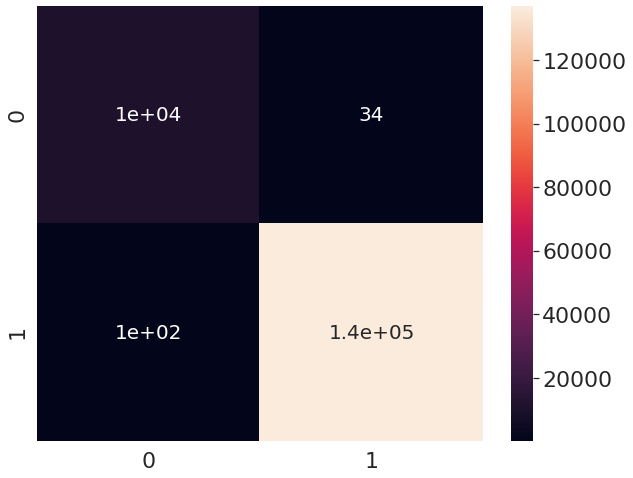

AUC score:  0.9979986318361675


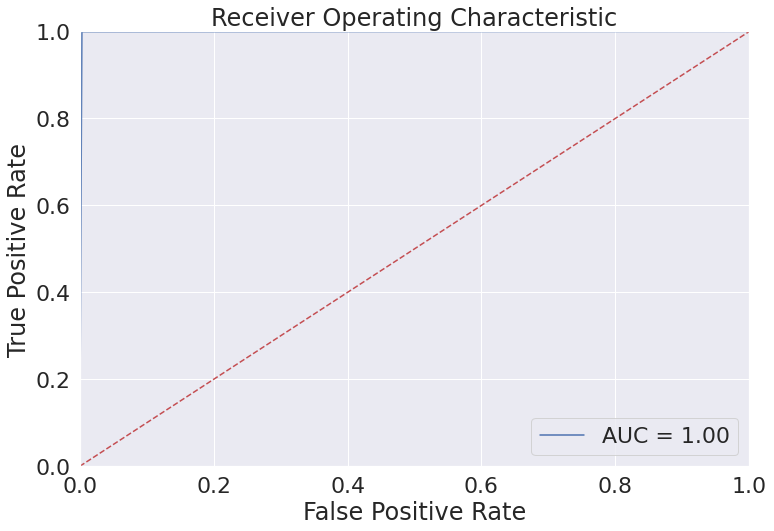

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [68]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=False)

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.991     0.997     0.994     10413
           2      1.000     0.999     1.000    136933

    accuracy                          0.999    147346
   macro avg      0.996     0.998     0.997    147346
weighted avg      0.999     0.999     0.999    147346



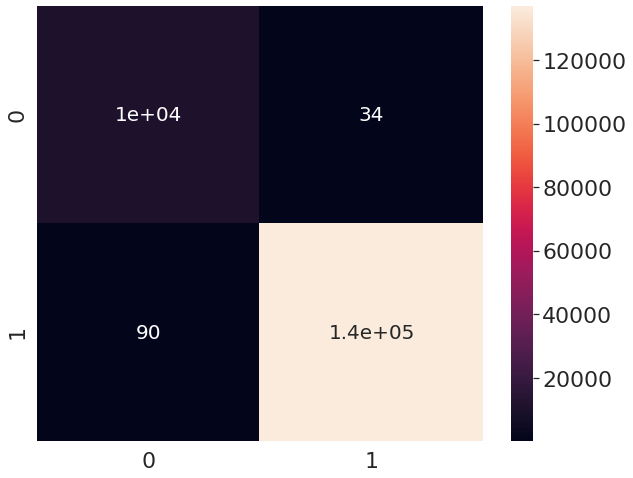

AUC score:  0.9980387974646135


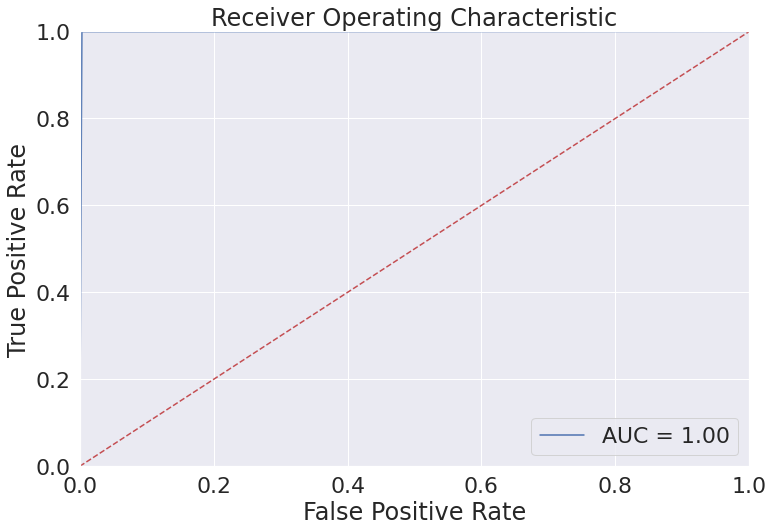

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [69]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=True)